<a href="https://colab.research.google.com/github/andrerubeis/andrerubeis/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import useful library

import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import ADASYN, SMOTE

#Import Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

SEED = 42

In [2]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [4]:
# Import Dataset
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
# select Categorical columns
categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region',
                       'TrafficType', 'VisitorType', 'Weekend']# , 'Revenue'# convert the target in binary {0,1}
df.Revenue[df.Revenue == True] = 1
df[categorical_columns] = df[categorical_columns].astype('category') # set types to category

numerical_columns = [x for x in df.columns if x not in categorical_columns]

In [8]:
# Unique values per column
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [9]:
nullValues = df.isnull().values.any()
print(f"The dataset contains null or missing values? {nullValues}")

The dataset contains null or missing values? False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

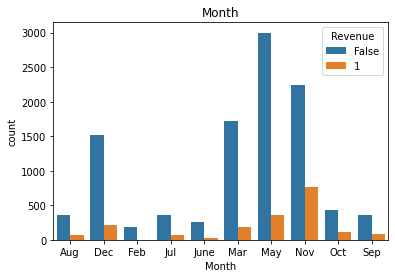

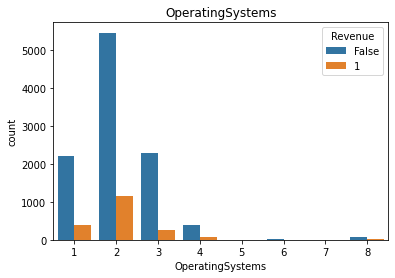

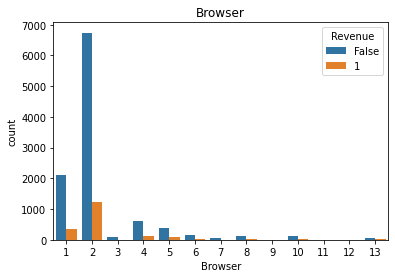

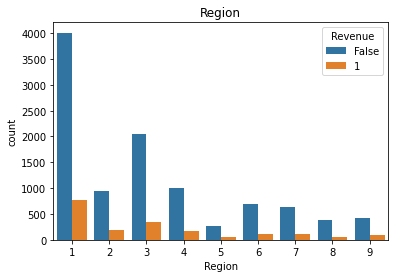

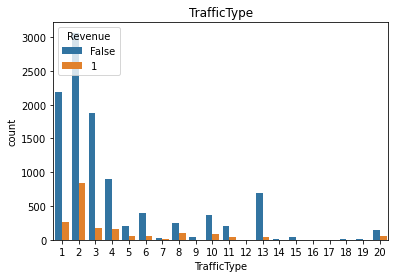

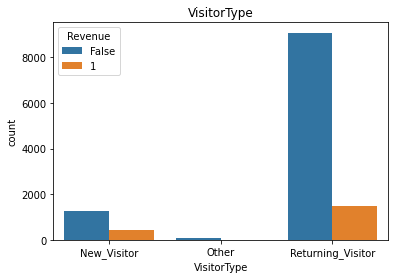

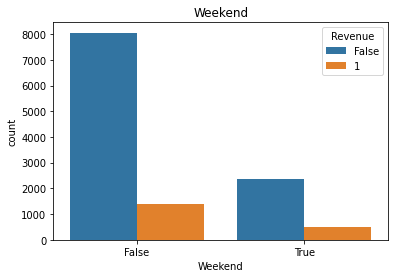

In [11]:
c = 0
for col in categorical_columns:
    sns.countplot(x = col, hue="Revenue", data = df)
    plt.title(f"{categorical_columns[c]}")
    c += 1
    plt.show()

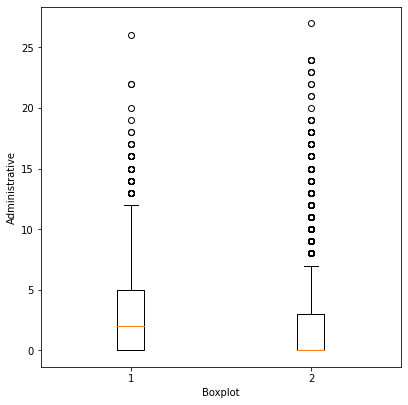

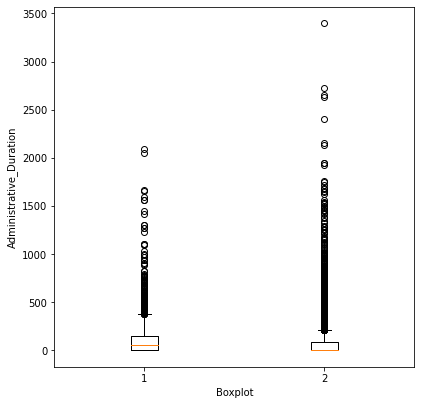

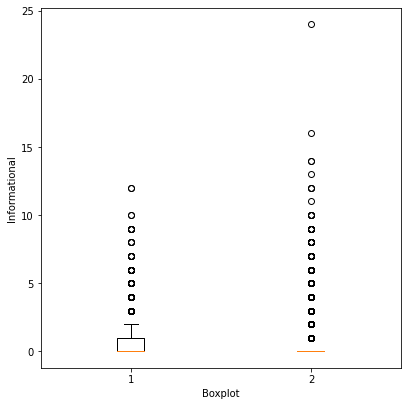

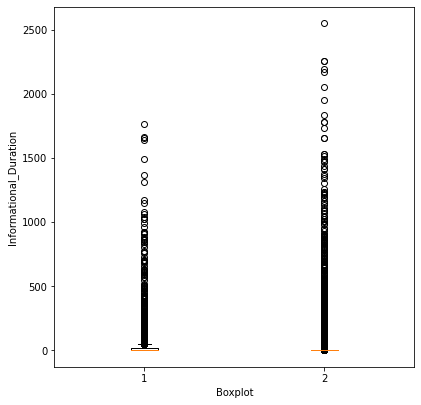

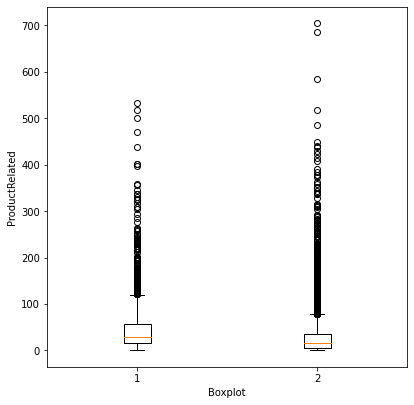

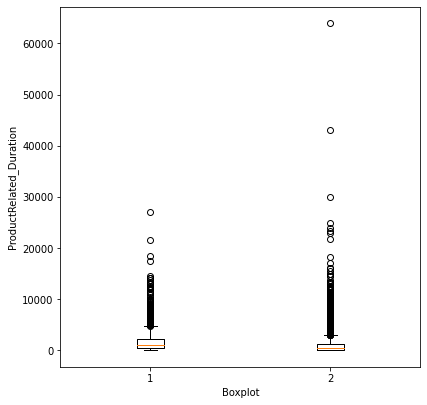

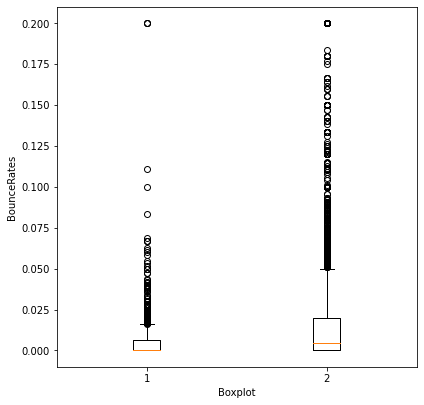

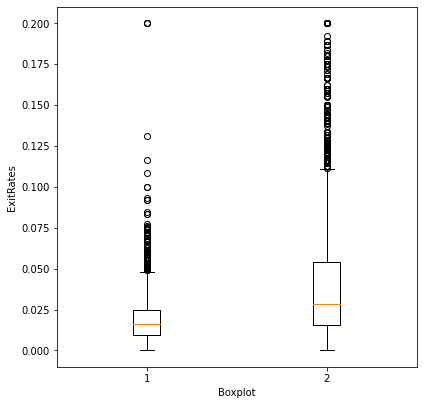

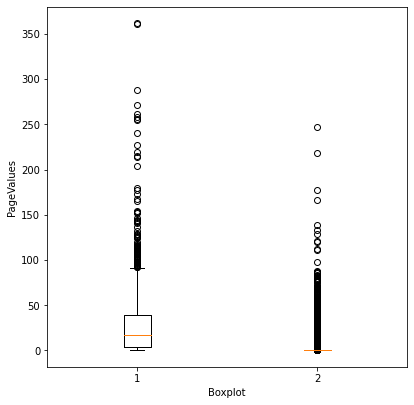

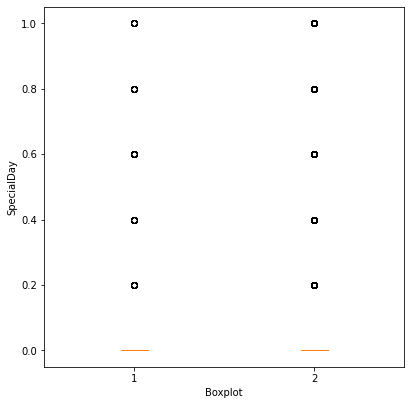

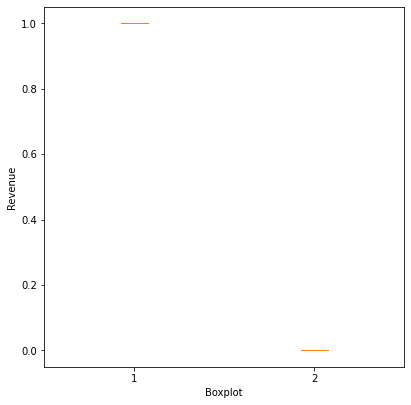

In [12]:
for col in numerical_columns:
  
    data_1 = df[df['Revenue'] == 1]
    data_2 = df[df['Revenue'] == 0]
    
    data = [data_1[col], data_2[col]]
 
    fig = plt.figure(figsize =(5, 5))
    
 
    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
 
    # Creating plot
    bp = ax.boxplot(data)
    
    plt.ylabel(col)
    plt.xlabel('Boxplot')
    # show plot
    plt.show()

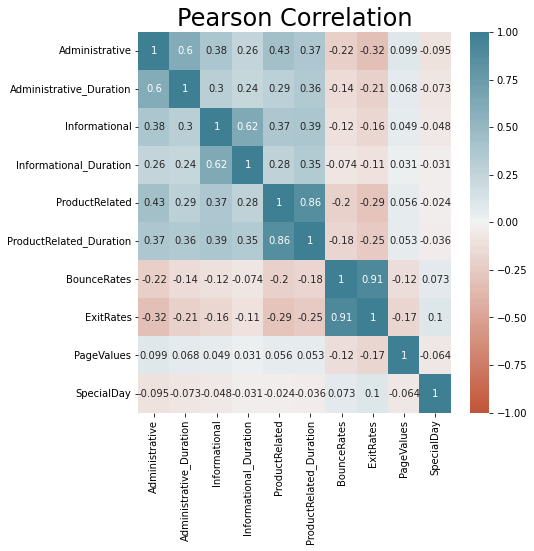

In [13]:
# Pearson Correlation
df_numerical = df[numerical_columns].copy()
df_numerical = (df_numerical-df_numerical.mean())/df_numerical.std()
corr = df_numerical.corr() 
plt.figure(figsize = (7,7))
sns.heatmap(corr, annot = True, 
            vmin = -1, vmax = 1, center = 0,
            cmap = sns.diverging_palette(20, 220, n = 200))
plt.title('Pearson Correlation', fontsize = 24)
plt.savefig('CorrelationMap.jpg')

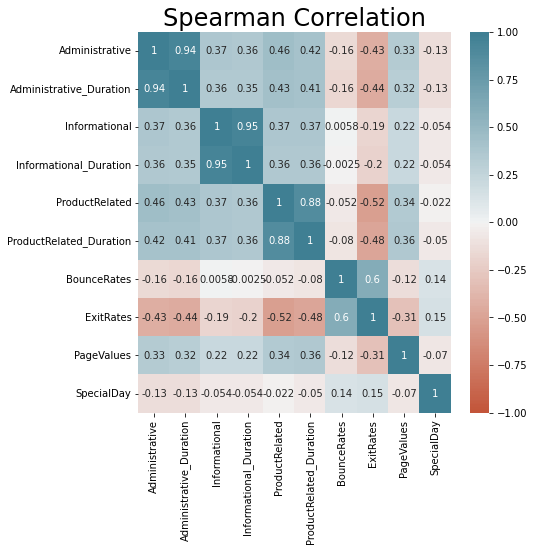

In [14]:
# Spearman correlation
df_numerical = df[numerical_columns].copy()
df_numerical = (df_numerical-df_numerical.mean())/df_numerical.std()
corr = df_numerical.corr(method='spearman') #
plt.figure(figsize = (7,7))
sns.heatmap(corr, annot = True, 
            vmin = -1, vmax = 1, center = 0,
            cmap = sns.diverging_palette(20, 220, n = 200))
plt.title('Spearman Correlation', fontsize = 24)
plt.savefig('CorrelationMap.jpg')

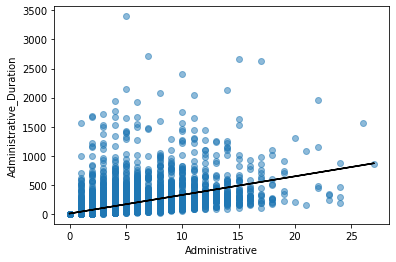

In [15]:
x = df['Administrative']
y = df['Administrative_Duration']
plt.scatter(x, y, alpha=0.5)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"black")
plt.xlabel('Administrative')
plt.ylabel('Administrative_Duration')
plt.show()

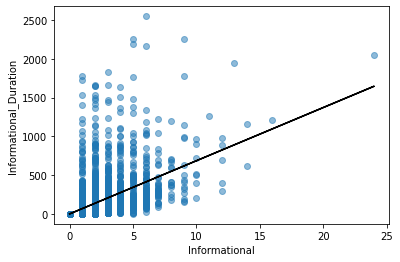

In [16]:
x = df['Informational']
y = df['Informational_Duration']
plt.scatter(x, y, alpha=0.5)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"black")
plt.xlabel('Informational')
plt.ylabel('Informational_Duration')
plt.show()

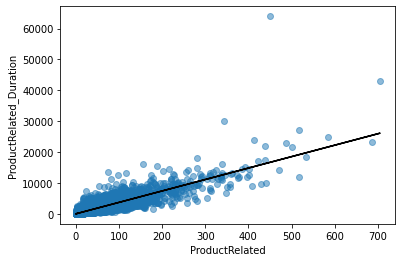

In [17]:
x = df['ProductRelated']
y = df['ProductRelated_Duration']
plt.scatter(x, y, alpha=0.5)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"black")
plt.xlabel('ProductRelated')
plt.ylabel('ProductRelated_Duration')
plt.show()

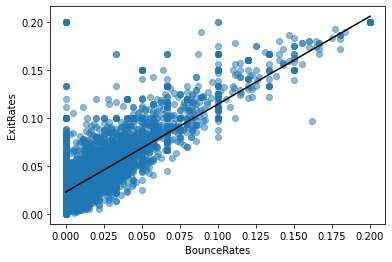

In [18]:
x = df['BounceRates']
y = df['ExitRates']
plt.scatter(x, y, alpha=0.5)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"black")
plt.xlabel('BounceRates')
plt.ylabel('ExitRates')
plt.show()

In [19]:
df2 = df.copy()
y_2 = df2['Revenue']
df2.drop(columns = ['ProductRelated_Duration', 'BounceRates','Administrative_Duration', 'Informational_Duration', 'Revenue' ], axis = 1, inplace= True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Administrative    12330 non-null  int64   
 1   Informational     12330 non-null  int64   
 2   ProductRelated    12330 non-null  int64   
 3   ExitRates         12330 non-null  float64 
 4   PageValues        12330 non-null  float64 
 5   SpecialDay        12330 non-null  float64 
 6   Month             12330 non-null  category
 7   OperatingSystems  12330 non-null  category
 8   Browser           12330 non-null  category
 9   Region            12330 non-null  category
 10  TrafficType       12330 non-null  category
 11  VisitorType       12330 non-null  category
 12  Weekend           12330 non-null  category
dtypes: category(7), float64(3), int64(3)
memory usage: 665.1 KB


In [20]:
df2.columns

Index(['Administrative', 'Informational', 'ProductRelated', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend'],
      dtype='object')

In [21]:
numerical_columns =['Administrative', 'Informational', 'ProductRelated','ExitRates', 'PageValues', 'SpecialDay']
data = df2.copy()[numerical_columns]
data.shape

(12330, 6)

In [22]:
#find absolute value of z-score for each observation

z = np.abs(stats.zscore(data))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean_zscore = data[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
data_clean_zscore.shape

(10339, 6)

In [23]:
data_clean_zscore.describe()

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay
count,10339.000000,10339.000000,10339.00000,10339.000000,10339.000000,10339.000000
mean,2.140342,0.373827,27.82271,0.033990,4.119746,0.030158
std,2.797156,0.869073,28.74736,0.030174,10.807806,0.119292
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,8.00000,0.013878,0.000000,0.000000
50%,1.000000,0.000000,18.00000,0.025000,0.000000,0.000000
75%,4.000000,0.000000,36.00000,0.043160,0.000000,0.000000
max,12.000000,4.000000,165.00000,0.186667,61.581712,0.600000


In [24]:
#find Q1, Q3, and interquartile range for each column
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean_IQR = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean_IQR.shape

(5934, 6)

In [25]:
df_categorical = df[categorical_columns].copy()
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Month             12330 non-null  category
 1   OperatingSystems  12330 non-null  category
 2   Browser           12330 non-null  category
 3   Region            12330 non-null  category
 4   TrafficType       12330 non-null  category
 5   VisitorType       12330 non-null  category
 6   Weekend           12330 non-null  category
dtypes: category(7)
memory usage: 87.1 KB


In [26]:
data.shape

(12330, 6)

In [27]:
data = data[ data['ProductRelated'] < 500]
data.shape

(12323, 6)

In [28]:
data = data[data["Administrative"] < 22]
data.shape

(12311, 6)

In [29]:
data = data[data["Informational"] < 15]
data.shape

(12310, 6)

In [55]:
df_clean = data.join(df_categorical)
df_clean = df_clean.join(y_2)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12310 entries, 0 to 12329
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Administrative    12310 non-null  int64   
 1   Informational     12310 non-null  int64   
 2   ProductRelated    12310 non-null  int64   
 3   ExitRates         12310 non-null  float64 
 4   PageValues        12310 non-null  float64 
 5   SpecialDay        12310 non-null  float64 
 6   Month             12310 non-null  category
 7   OperatingSystems  12310 non-null  category
 8   Browser           12310 non-null  category
 9   Region            12310 non-null  category
 10  TrafficType       12310 non-null  category
 11  VisitorType       12310 non-null  category
 12  Weekend           12310 non-null  category
 13  Revenue           12310 non-null  object  
dtypes: category(7), float64(3), int64(3), object(1)
memory usage: 1.1+ MB


In [57]:
df = df_clean.copy()

df.columns

Index(['Administrative', 'Informational', 'ProductRelated', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [73]:
#Y = df.Revenue.copy()
#df.drop(['Revenue'],axis=1, inplace=True)
#categorical_columns.remove('Revenue')
print((categorical_columns))
df_ohe = pd.get_dummies(df, categorical_columns)


df_ohe.shape

['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']


(12310, 71)

In [74]:
#STANDARDSCALER
n=StandardScaler()

scaled_df = n.fit_transform(df_ohe)

0.9065394171037785 expressed by 50 components


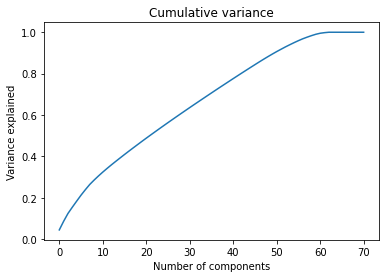

In [75]:
# PCA
PCA_df = PCA(random_state = SEED).fit(scaled_df)
pca_df = PCA_df.transform( scaled_df)

cumvar = np.cumsum(PCA_df.explained_variance_ratio_)

n_comp =  np.argmax(cumvar > .9)
#Plotting cumulative variance
plt.plot(cumvar)
plt.title('Cumulative variance')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')
print(f"{cumvar[n_comp]} expressed by {n_comp} components")

In [76]:
df_ohe.shape

(12310, 71)

In [97]:
pd.DataFrame(scaled_df)

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,-0.706127,-0.401148,-0.717336,3.226656,-0.3174,-0.308968,-0.19048,-0.403963,8.118015,-0.19048,...,-0.015613,-0.009013,-0.028513,-0.037187,-0.127857,-0.399463,-0.083384,0.411011,0.550258,-0.550258
1,-0.706127,-0.401148,-0.693668,1.170019,-0.3174,-0.308968,-0.19048,-0.403963,8.118015,-0.19048,...,-0.015613,-0.009013,-0.028513,-0.037187,-0.127857,-0.399463,-0.083384,0.411011,0.550258,-0.550258
2,-0.706127,-0.401148,-0.717336,3.226656,-0.3174,-0.308968,-0.19048,-0.403963,8.118015,-0.19048,...,-0.015613,-0.009013,-0.028513,-0.037187,-0.127857,-0.399463,-0.083384,0.411011,0.550258,-0.550258
3,-0.706127,-0.401148,-0.693668,1.992674,-0.3174,-0.308968,-0.19048,-0.403963,8.118015,-0.19048,...,-0.015613,-0.009013,-0.028513,-0.037187,-0.127857,-0.399463,-0.083384,0.411011,0.550258,-0.550258
4,-0.706127,-0.401148,-0.504328,0.141700,-0.3174,-0.308968,-0.19048,-0.403963,8.118015,-0.19048,...,-0.015613,-0.009013,-0.028513,-0.037187,-0.127857,-0.399463,-0.083384,0.411011,-1.817331,1.817331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12305,0.220077,-0.401148,0.513372,-0.289564,0.3437,-0.308968,-0.19048,2.475473,-0.123183,-0.19048,...,-0.015613,-0.009013,-0.028513,-0.037187,-0.127857,-0.399463,-0.083384,0.411011,-1.817331,1.817331
12306,-0.706127,-0.401148,-0.622666,-0.447869,-0.3174,-0.308968,-0.19048,-0.403963,-0.123183,-0.19048,...,-0.015613,-0.009013,-0.028513,-0.037187,-0.127857,-0.399463,-0.083384,0.411011,-1.817331,1.817331
12307,-0.706127,-0.401148,-0.598998,0.895800,-0.3174,-0.308968,-0.19048,-0.403963,-0.123183,-0.19048,...,-0.015613,-0.009013,-0.028513,-0.037187,-0.127857,-0.399463,-0.083384,0.411011,-1.817331,1.817331
12308,0.528812,-0.401148,-0.385991,-0.453642,-0.3174,-0.308968,-0.19048,-0.403963,-0.123183,-0.19048,...,-0.015613,-0.009013,-0.028513,-0.037187,-0.127857,-0.399463,-0.083384,0.411011,0.550258,-0.550258


In [77]:
# construct new dataset with 90% of variance explained.
X_pca = np.dot(scaled_df, PCA_df.components_[:n_comp,:].T)
X_pca = pd.DataFrame(X_pca, columns=["PC%d" % (x + 1) for x in range(n_comp)])
X_pca.shape

(12310, 50)

In [78]:
kbest = SelectKBest(f_classif)
Xfs = df_ohe.copy()
Xfs_train, Xfs_test, yfs_train, yfs_test = train_test_split(Xfs, Y, test_size=0.3, stratify = Y)


In [79]:
# First we split the dataset in: 70% training and 30% test set
# then the training set is splitted in: 75% in training and 25% in validation
X, X_test, y, y_test = train_test_split(X_pca, Y, test_size=0.3, stratify = Y)
X_val, X_train, y_val, y_train = train_test_split(X, y, test_size=0.75, stratify = y)

In [81]:
Y.value_counts()

False    10408
1         1902
Name: Revenue, dtype: int64

In [89]:
y_train=y_train.astype('int')
X_ADASYN, y_ADASYN = ADASYN().fit_resample(X_train, y_train)
print("ADASYN generate a dataset of ", X_ADASYN.shape, "records, while the original dataset have ", X_train.shape, " records")
print( 'The new dataset has' , np.count_nonzero(y_ADASYN == 0), 'elements as Revenue=True, and', np.count_nonzero(y_ADASYN == 1), 'elements Revenue=False')


ADASYN generate a dataset of  (10935, 50) records, while the original dataset have  (6463, 50)  records
The new dataset has 5465 elements as Revenue=True, and 5470 elements Revenue=False


In [90]:
y_train=y_train.astype('int')
X_SMOTE, y_SMOTE = SMOTE().fit_resample(X_train, y_train)
print("SMOTE generate a dataset of ", X_SMOTE.shape, "records, while the original dataset have ", X_train.shape, " records")
print( 'The new dataset has' , np.count_nonzero(y_SMOTE == 0), 'elements as Revenue=True, and', np.count_nonzero(y_SMOTE == 1), 'elements Revenue=False')


SMOTE generate a dataset of  (10930, 50) records, while the original dataset have  (6463, 50)  records
The new dataset has 5465 elements as Revenue=True, and 5465 elements Revenue=False


In [91]:
binary_metricsPCA = pd.DataFrame(columns=["Accuracy", "Precision", "Sensitivity", "F1 Score"])
binary_metricsFS = pd.DataFrame(columns=["Accuracy", "Precision", "Sensitivity", "F1 Score"])
binary_metricsORIGINAL = pd.DataFrame(columns=["Accuracy", "Precision", "Sensitivity", "F1 Score"])

In [92]:
# Methods and hyperparamters 
PCAparams = {
    
    'LR' : {'solver' : ['newton-cg', 'lbfgs', 'liblinear'] },
    'SVM' : {'C' : np.logspace(0, 4, 5) },
    'KNN' : {'n_neighbors' : [5,7,9,11] },
    'GiniTREE' : {'max_depth': np.arange(5, 20) },
    'RandomForest':{'n_estimators':np.arange(50,200, 50),'max_depth': np.arange(5, 20)}
}


PCAmethods = {
    
    'LR' :  LogisticRegression(max_iter = 10000, random_state = SEED, solver = 'lbfgs'),
    'SVM' : svm.SVC(kernel = "rbf", random_state = SEED),
    'KNN' : KNeighborsClassifier(),
    'GiniTREE' : DecisionTreeClassifier(criterion = 'gini', random_state = SEED),
    'RandomForest':RandomForestClassifier(criterion = 'gini', random_state = SEED, max_features = 'sqrt')
}

In [93]:
def trainFunction(methodName, paramName, dataset = 'original'):
    scaler = StandardScaler()
    if(dataset == 'original'):
        scal_X_train = scaler.fit_transform(X_train)
        x_train = scal_X_train
        Y = y_train
    elif(dataset == 'adasyn'):
        scal_X_train = scaler.fit_transform(X_ADASYN)
        x_train = scal_X_train
        Y = y_ADASYN
    elif(dataset == 'smote'):
        scal_X_train = scaler.fit_transform(X_SMOTE)
        x_train = scal_X_train
        Y = y_SMOTE

    method = PCAmethods[methodName]
    best_score = 0

    for p in PCAparams[methodName].get(paramName):
        params = {paramName : p}
        model = method.set_params(**params).fit(x_train, Y)
        y_pred = model.predict(X_val)

        cr = classification_report(y_val, y_pred, output_dict=True)
        #print('Accuracy for', paramName, ' = ', p, ' = ',cr['accuracy'])
        #print('Weighted precision = ', cr['weighted avg'])
        if( cr['weighted avg']['f1-score'] > best_score):
            best_score = cr['weighted avg']['f1-score']
            bestP = p

    params = {paramName : bestP}
    newX_train = np.concatenate( (x_train, X_val), axis=0)
    newY_train = np.concatenate( (Y, y_val), axis=0)
    model = method.set_params(**params).fit(newX_train, newY_train)

    y_pred = model.predict(X_test)
    cr = classification_report(y_test, y_pred, output_dict=True)
    binary_metricsPCA.loc[dataset + '_' + methodName] = [cr['accuracy'], cr['weighted avg']['precision'], cr['weighted avg']['recall'], cr['weighted avg']['f1-score']]
    print('Accuracy for', paramName, ' = ', bestP, ' = ',cr['accuracy'])
    print('Weighted precision = ', cr['weighted avg'])

In [ ]:
algs = ['SVM',  'GiniTREE','KNN', 'LR','RandomForest']
paramNames = ['C',  'max_depth','n_neighbors', 'solver', 'n_estimators']
for method, paramName in zip(algs, paramNames):
    print('> Training: ' + method)
    trainFunction(method, paramName)

In [ ]:
algs = ['SVM',  'GiniTREE','KNN', 'LR', 'RandomForest']
paramNames = ['C',  'max_depth', 'n_neighbors', 'solver','n_estimators']
for method, paramName in zip(algs, paramNames):
    print('> Training: ' + method)
    trainFunction( method, paramName, dataset = 'adasyn')

In [ ]:
algs = ['SVM',  'GiniTREE','KNN', 'LR', 'RandomForest']
paramNames = ['C',  'max_depth', 'n_neighbors', 'solver','n_estimators']
for method, paramName in zip(algs, paramNames):
    print('> Training: ' + method)
    trainFunction( method, paramName, dataset = 'smote')

In [ ]:
binary_metricsPCA.sort_values(by='F1 Score', ascending=False)